In [11]:
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.initializers import GlorotNormal, GlorotUniform, HeNormal, HeUniform, RandomNormal, RandomUniform
from keras.optimizers import SGD, Adam
from keras.regularizers import l1, l2, L1L2

# Loading Data

In [12]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Use some of the training data to create a validation dataset. This will be used to validate our model based on the training data and see what changes can be made to improve it. Once the best method has been decided, the test data will be used.

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_valid, X_train = X_train[:6000] / 255.0, X_train[6000:] / 255.0
y_valid, y_train = y_train[:6000], y_train[6000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Since we're trying to categorize our data into multiple classes, we use a sparse categorical cross-entropy loss function. This is suitable for our network because our labels are not one-hot encoded, but simple integers.

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.8631 - accuracy: 0.7090 - val_loss: 0.5426 - val_accuracy: 0.8205
Epoch 2/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5690 - accuracy: 0.8039 - val_loss: 0.4756 - val_accuracy: 0.8357
Epoch 3/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5002 - accuracy: 0.8255 - val_loss: 0.4240 - val_accuracy: 0.8525
Epoch 4/15
1688/1688 [==============================] - 9s 6ms/step - loss: 0.4616 - accuracy: 0.8363 - val_loss: 0.4013 - val_accuracy: 0.8620
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4368 - accuracy: 0.8437 - val_loss: 0.3870 - val_accuracy: 0.8660
Epoch 6/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4180 - accuracy: 0.8514 - val_loss: 0.3730 - val_accuracy: 0.8705
Epoch 7/15
1688/1688 [==============================] - 9s 6ms/step - loss: 0.4015 - accuracy: 0.8568 - val_loss: 0.3652 - val_accuracy

# Activation Functions

Below, we test various activation functions for the 2 hidden layers of the MLP. We go through every possible combination and record the accuracy to see which combination returns the highest accuracy on the validation set.

In [ ]:
act_funcs = ["relu", "sigmoid", "tanh"]

for i in act_funcs:
  for j in act_funcs:
    print("Hidden layer 1: " + i + "\nHidden layer 2: " + j)

    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation=i))
    model.add(Dense(100, activation=j))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=15,
                        validation_data=(X_valid, y_valid))

Hidden layer 1: relu
Hidden layer 2: relu
Epoch 1/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.7126 - accuracy: 0.7659 - val_loss: 0.5445 - val_accuracy: 0.8118
Epoch 2/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4896 - accuracy: 0.8291 - val_loss: 0.4543 - val_accuracy: 0.8447
Epoch 3/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4424 - accuracy: 0.8441 - val_loss: 0.4279 - val_accuracy: 0.8510
Epoch 4/15
1688/1688 [==============================] - 9s 6ms/step - loss: 0.4146 - accuracy: 0.8548 - val_loss: 0.4456 - val_accuracy: 0.8410
Epoch 5/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3941 - accuracy: 0.8613 - val_loss: 0.3879 - val_accuracy: 0.8643
Epoch 6/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3776 - accuracy: 0.8669 - val_loss: 0.4095 - val_accuracy: 0.8555
Epoch 7/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3630 - accura

To summarize the findings of trying out activation functions, the table below shows the accuracy for every combination on the 15th epoch. The rows correspond to hidden layer 1, whereas the columns to hidden layer 2. It is evident that ReLU is superior compared to sigmoid and tanh activation functions, as setting it for both hidden layers gives out the most accurate predictions on the validation set.

| HL1 / HL2 | ReLU   | Sigmoid | Tanh   |
|---------|--------|---------|--------|
| ReLU    | 0.8805 | 0.8635  | 0.8757 |
| Sigmoid | 0.8553 | 0.8245  | 0.8570 |
| Tanh    | 0.8768 | 0.8603  | 0.8762 |

# Weight Initializers

Test various weight initilization methods.

In [ ]:
weight_init = [GlorotNormal(), GlorotUniform(), HeNormal(), HeUniform(), RandomNormal(), RandomUniform()]

for i in weight_init:
  for j in weight_init:
    print("Weight initializer layer 1: " + str(i) + "\nWeight initializer layer 2: " + str(j))

    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation="relu", kernel_initializer=i))
    model.add(Dense(100, activation="relu", kernel_initializer=j))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=15,
                        validation_data=(X_valid, y_valid))

Weight initializer layer 1: <keras.src.initializers.initializers.GlorotNormal object at 0x7b0e9c95c310>
Weight initializer layer 2: <keras.src.initializers.initializers.RandomNormal object at 0x7b0e4718f2e0>
Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7507 - accuracy: 0.7539 - val_loss: 0.5381 - val_accuracy: 0.8212
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5025 - accuracy: 0.8239 - val_loss: 0.5068 - val_accuracy: 0.8265
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4558 - accuracy: 0.8390 - val_loss: 0.4625 - val_accuracy: 0.8393
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4275 - accuracy: 0.8490 - val_loss: 0.4478 - val_accuracy: 0.8415
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4059 - accuracy: 0.8562 - val_loss: 0.4011 - val_accuracy: 0.8603
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.8223 - accuracy: 0.7301 - val_loss: 0.6051 - val_accuracy: 0.7852
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5215 - accuracy: 0.8193 - val_loss: 0.4728 - val_accuracy: 0.8412
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4676 - accuracy: 0.8344 - val_loss: 0.4670 - val_accuracy: 0.8330
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4376 - accuracy: 0.8460 - val_loss: 0.4180 - val_accuracy: 0.8573
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4164 - accuracy: 0.8541 - val_loss: 0.4048 - val_accuracy: 0.8618
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3981 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.8580
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3845 - accuracy: 0.8650 - val_loss: 0.3880 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7619 - accuracy: 0.7531 - val_loss: 0.5311 - val_accuracy: 0.8182
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5033 - accuracy: 0.8248 - val_loss: 0.5729 - val_accuracy: 0.7947
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4569 - accuracy: 0.8394 - val_loss: 0.4664 - val_accuracy: 0.8372
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4285 - accuracy: 0.8494 - val_loss: 0.4281 - val_accuracy: 0.8470
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4071 - accuracy: 0.8569 - val_loss: 0.4075 - val_accuracy: 0.8563
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3907 - accuracy: 0.8624 - val_loss: 0.4056 - val_accuracy: 0.8587
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3779 - accuracy: 0.8664 - val_loss: 0.3743 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7956 - accuracy: 0.7456 - val_loss: 0.5755 - val_accuracy: 0.7967
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5097 - accuracy: 0.8233 - val_loss: 0.5277 - val_accuracy: 0.8160
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4610 - accuracy: 0.8387 - val_loss: 0.4413 - val_accuracy: 0.8463
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4333 - accuracy: 0.8499 - val_loss: 0.4319 - val_accuracy: 0.8480
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4116 - accuracy: 0.8561 - val_loss: 0.4034 - val_accuracy: 0.8590
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3935 - accuracy: 0.8624 - val_loss: 0.4464 - val_accuracy: 0.8460
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3807 - accuracy: 0.8667 - val_loss: 0.3935 - val_accuracy:

We can see that the values are all within a range of 1.5% accuracy, which is not much. It is thus diffuclt to conclude which weight initialization method is the best for our network. This could be due to the number of epochs used, or because the size of our dataset is not big enough for the weight initializations to make a noticeable difference in accuracy. It should be noted that the accuracies for each combination fluctuated up and down before reaching the 15th epoch. Sometimes the 14th epoch was actually more accurate, but in any case the same epoch was considered for all runs to achieve a fairer result.

Therefore, the best solution here would be to choose the method that is most theoretically correct for a layer using the ReLU activation function, i.e. He initialization with a normal distribution, as this is the one used in He's paper.

| HL1 / HL2     | GlorotNormal | GlorotUniform | HeNormal | HeUniform | RandomNormal | RandomUniform |
|---------------|--------------|---------------|----------|-----------|--------------|---------------|
| GlorotNormal  | 0.8792       | 0.8827        | 0.8790   | 0.8838    | 0.8798       | 0.8802        |
| GlorotUniform | 0.8797       | 0.8705        | 0.8813   | 0.8813    | 0.8753       | 0.8715        |
| HeNormal      | 0.8687       | 0.8837        | 0.8715   | 0.8740    | 0.8825       | 0.8727        |
| HeUniform     | 0.8815       | 0.8780        | 0.8792   | 0.8785    | 0.8815       | 0.8762        |
| RandomNormal  | 0.8792       | 0.8822        | 0.8817   | 0.8688    | 0.8837       | 0.8773        |
| RandomUniform | 0.8823       | 0.8780        | 0.8648   | 0.8832    | 0.8725       | 0.8793        |

# Optimizer Hyperparameters

Vary the learning rate, classical momentum, and Nesterov momentum.

In [ ]:
lr = [0.005, 0.01, 0.05, 0.1, 0.5]
mom = [0.1, 0.5, 0.9]
nest = [0, 1]

for i in lr:
  for j in mom:
    for k in nest:
      print('Learning rate = ' + str(i) + '\nClassical momentum = ' + str(j) + '\nNesterov momentum = ' + str(bool(k)))
      model = Sequential()
      model.add(Flatten(input_shape=[28, 28]))
      model.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
      model.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
      model.add(Dense(10, activation="softmax"))

      model.compile(loss="sparse_categorical_crossentropy",
                    optimizer=SGD(
                        learning_rate=i,
                        momentum=j,
                        nesterov=k
                    ),
                    metrics=["accuracy"])

      history = model.fit(X_train, y_train, epochs=15,
                          validation_data=(X_valid, y_valid))

Learning rate = 0.005
Classical momentum = 0.1
Nesterov momentum = False
Epoch 1/15
1688/1688 [==============================] - 11s 4ms/step - loss: 0.8151 - accuracy: 0.7404 - val_loss: 0.5712 - val_accuracy: 0.8095
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5285 - accuracy: 0.8188 - val_loss: 0.5022 - val_accuracy: 0.8278
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4753 - accuracy: 0.8354 - val_loss: 0.4508 - val_accuracy: 0.8485
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4469 - accuracy: 0.8439 - val_loss: 0.4388 - val_accuracy: 0.8493
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4267 - accuracy: 0.8516 - val_loss: 0.4273 - val_accuracy: 0.8522
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4114 - accuracy: 0.8572 - val_loss: 0.4288 - val_accuracy: 0.8483
Epoch 7/15
1688/1688 [==============================] - 7s 4ms

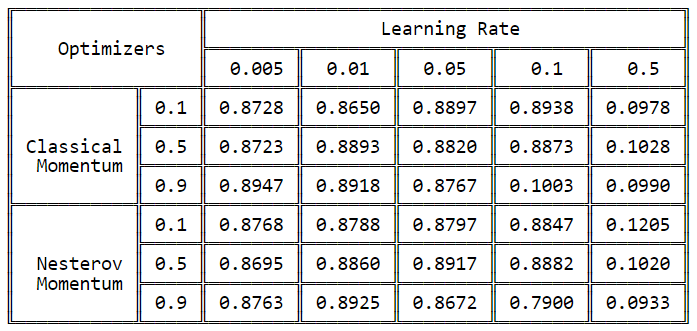

We tried 5 values for the learning rate and 3 values for the classical momentum. We then repeated the runs with Nesterov momentum enabled.
When $\eta=0.5$, the validation data accuracy drops significantly to about 10%. For lower values of $\eta$, the accuracy is always above 86% with one exception. For $\eta=0.1$ and classical momentum of 0.9, the accuracy is 10%, however when Nesterov momentum is turned on the accuracy returns to 79%.

Otherwise, accuracy seems to peak when $\eta=0.01$ --- which happens to be the default learning rate value in Keras for stochastic gradient descent --- and momentum = 0.9, exceeding 89%. In fact, 3 of the 4 accuracies that are above 89% have a momentum 0.9 (the other one being 0.5). This highlights that setting a high value for momentum will produce more accurate models, since it accounts for a larger fraction of the gradients of previous epochs while calculating the new gradient.

Adam optimizer without Dropout: 0.8965

Adam optimizer with Dropout: 0.8920

# Regularization

Test the accuracy with Dropouy, no Dropout, L1, and L2.

In [5]:
dropout = [0.1, 0.2, 0.3]

for i in dropout:
  for j in dropout:
    print('Dropout rate HL1: ' + str(i) + '\nDropout rate HL2: ' + str(j))

    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
    model.add(Dropout(i))
    model.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
    model.add(Dropout(j))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=15,
                        validation_data=(X_valid, y_valid))

Dropout rate HL1: 0.1
Dropout rate HL2: 0.1
Epoch 1/15
1688/1688 [==============================] - 10s 4ms/step - loss: 0.5249 - accuracy: 0.8111 - val_loss: 0.3750 - val_accuracy: 0.8615
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3876 - accuracy: 0.8571 - val_loss: 0.3512 - val_accuracy: 0.8717
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3576 - accuracy: 0.8685 - val_loss: 0.3330 - val_accuracy: 0.8782
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3338 - accuracy: 0.8772 - val_loss: 0.3322 - val_accuracy: 0.8782
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3150 - accuracy: 0.8826 - val_loss: 0.3333 - val_accuracy: 0.8742
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.8863 - val_loss: 0.3241 - val_accuracy: 0.8797
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2903 - accura

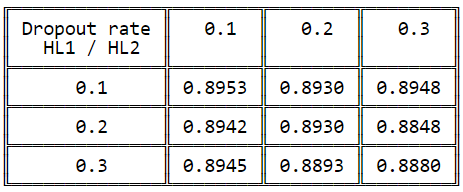

Epoch 1/30
1688/1688 [==============================] - 13s 4ms/step - loss: 0.4859 - accuracy: 0.8242 - val_loss: 0.4252 - val_accuracy: 0.8345
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3663 - accuracy: 0.8656 - val_loss: 0.3430 - val_accuracy: 0.8712
Epoch 3/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3303 - accuracy: 0.8765 - val_loss: 0.3382 - val_accuracy: 0.8750
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.8876 - val_loss: 0.3259 - val_accuracy: 0.8803
Epoch 5/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2847 - accuracy: 0.8934 - val_loss: 0.3238 - val_accuracy: 0.8812
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2704 - accuracy: 0.8988 - val_loss: 0.3147 - val_accuracy: 0.8875
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2560 - accuracy: 0.9035 - val_loss: 0.3164 - val_accuracy

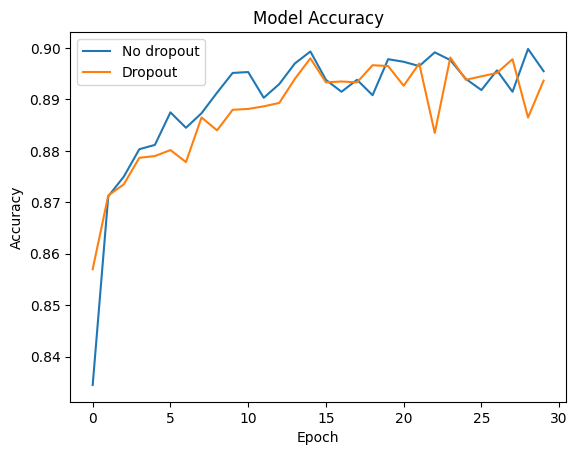

In [5]:
model1 = Sequential()
model1.add(Flatten(input_shape=[28, 28]))
model1.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model1.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model1.add(Dense(10, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history1 = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


model2 = Sequential()
model2.add(Flatten(input_shape=[28, 28]))
model2.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No dropout', 'Dropout'], loc='upper left')
plt.show()

In [ ]:
rates = [0, 0.1]
hist = []

for i in rates:
  for j in rates:

    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation="relu", kernel_initializer=HeNormal(), kernel_regularizer=l2(i)))
    model.add(Dense(100, activation="relu", kernel_initializer=HeNormal(), kernel_regularizer=l2(j)))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=15,
                        validation_data=(X_valid, y_valid))
    hist.append(history)


for i in hist:
  plt.plot(i.history['val_accuracy'])

plt.title('Model Accuracy with L2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No regularisation', 'L2 in HL2', 'L1 in HL1', 'L1 in HL1/HL2'], loc='lower right')
plt.show()

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4910 - accuracy: 0.8241 - val_loss: 0.3797 - val_accuracy: 0.8662
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3624 - accuracy: 0.8675 - val_loss: 0.3488 - val_accuracy: 0.8718
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3248 - accuracy: 0.8800 - val_loss: 0.3574 - val_accuracy: 0.8747
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3026 - accuracy: 0.8878 - val_loss: 0.3339 - val_accuracy: 0.8802
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.8934 - val_loss: 0.3080 - val_accuracy: 0.8892
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2699 - accuracy: 0.8979 - val_loss: 0.3044 - val_accuracy: 0.8928
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2563 - accuracy: 0.9034 - val_loss: 0.3200 - val_accuracy:

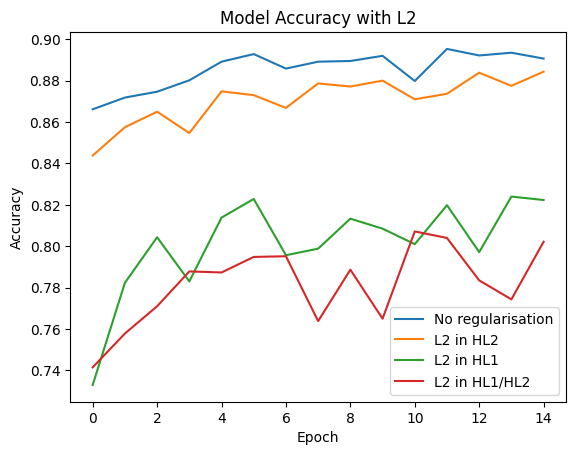

In [10]:
for i in hist:
  plt.plot(i.history['val_accuracy'])

plt.title('Model Accuracy with L2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No regularisation', 'L2 in HL2', 'L2 in HL1', 'L2 in HL1/HL2'], loc='lower right')
plt.show()

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4827 - accuracy: 0.8261 - val_loss: 0.3770 - val_accuracy: 0.8640
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3641 - accuracy: 0.8666 - val_loss: 0.3319 - val_accuracy: 0.8785
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3271 - accuracy: 0.8788 - val_loss: 0.3193 - val_accuracy: 0.8798
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3054 - accuracy: 0.8869 - val_loss: 0.3295 - val_accuracy: 0.8805
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2862 - accuracy: 0.8939 - val_loss: 0.3118 - val_accuracy: 0.8865
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8988 - val_loss: 0.3275 - val_accuracy: 0.8885
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2606 - accuracy: 0.9027 - val_loss: 0.2967 - val_accuracy:

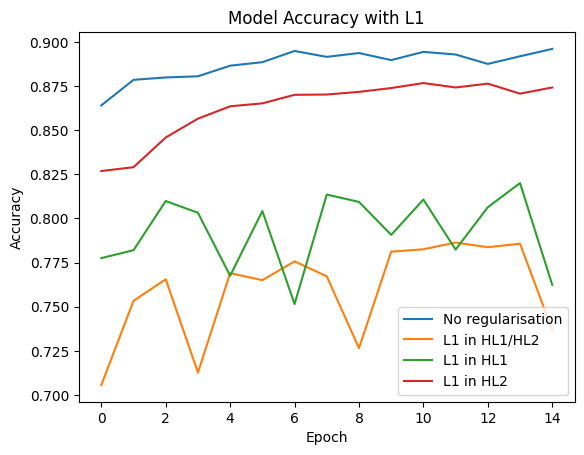

In [6]:
model1 = Sequential()
model1.add(Flatten(input_shape=[28, 28]))
model1.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model1.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model1.add(Dense(10, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history1 = model1.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

plt.plot(history1.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy with L1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No regularisation', 'L1 in HL1/HL2', 'L1 in HL1', 'L1 in HL2'], loc='lower right')
plt.show()

For both L1 and L2, the models without any regularization were more accurate. The accuracy graphs were pretty much identical. Both times, no regularization produced slightly higher slightly accuracies than using a regularizer only in the second hidden layer. Using it in only the first one or both layers yielded significantly lower accuracies. Therefore, we will not employ any regularization in the final model.

# Architecture

Vary the number of neurons in each layer.

Epoch 1/15
1688/1688 [==============================] - 14s 7ms/step - loss: 0.4850 - accuracy: 0.8261 - val_loss: 0.4079 - val_accuracy: 0.8530
Epoch 2/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3672 - accuracy: 0.8661 - val_loss: 0.3619 - val_accuracy: 0.8680
Epoch 3/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3281 - accuracy: 0.8775 - val_loss: 0.3480 - val_accuracy: 0.8740
Epoch 4/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3029 - accuracy: 0.8863 - val_loss: 0.3398 - val_accuracy: 0.8790
Epoch 5/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2874 - accuracy: 0.8915 - val_loss: 0.3427 - val_accuracy: 0.8737
Epoch 6/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2706 - accuracy: 0.8978 - val_loss: 0.3035 - val_accuracy: 0.8885
Epoch 7/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2597 - accuracy: 0.9022 - val_loss: 0.3253 - val_acc

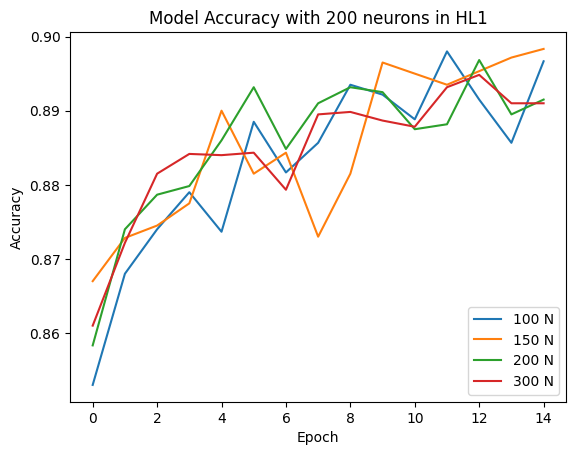

Epoch 1/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.4855 - accuracy: 0.8262 - val_loss: 0.3881 - val_accuracy: 0.8560
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3633 - accuracy: 0.8660 - val_loss: 0.3660 - val_accuracy: 0.8687
Epoch 3/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3272 - accuracy: 0.8786 - val_loss: 0.3426 - val_accuracy: 0.8765
Epoch 4/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3044 - accuracy: 0.8865 - val_loss: 0.3110 - val_accuracy: 0.8873
Epoch 5/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2860 - accuracy: 0.8932 - val_loss: 0.3572 - val_accuracy: 0.8680
Epoch 6/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2712 - accuracy: 0.8986 - val_loss: 0.3152 - val_accuracy: 0.8872
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2587 - accuracy: 0.9021 - val_loss: 0.3160 - val_ac

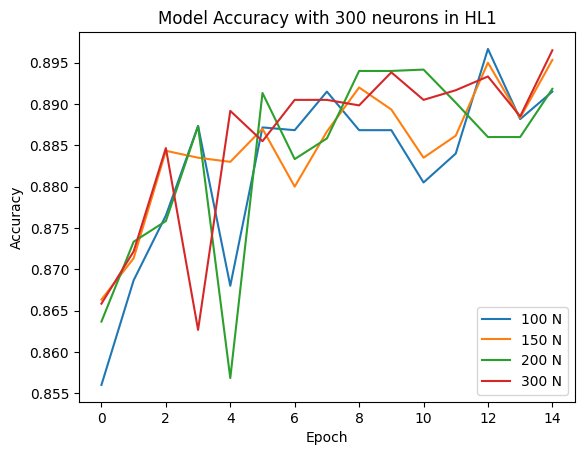

Epoch 1/15
1688/1688 [==============================] - 15s 8ms/step - loss: 0.4813 - accuracy: 0.8271 - val_loss: 0.3948 - val_accuracy: 0.8565
Epoch 2/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3640 - accuracy: 0.8661 - val_loss: 0.3579 - val_accuracy: 0.8725
Epoch 3/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3272 - accuracy: 0.8780 - val_loss: 0.3327 - val_accuracy: 0.8772
Epoch 4/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3032 - accuracy: 0.8886 - val_loss: 0.3148 - val_accuracy: 0.8887
Epoch 5/15
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2818 - accuracy: 0.8950 - val_loss: 0.3098 - val_accuracy: 0.8855
Epoch 6/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2680 - accuracy: 0.9001 - val_loss: 0.3084 - val_accuracy: 0.8845
Epoch 7/15
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2553 - accuracy: 0.9042 - val_loss: 0.3087 - val_ac

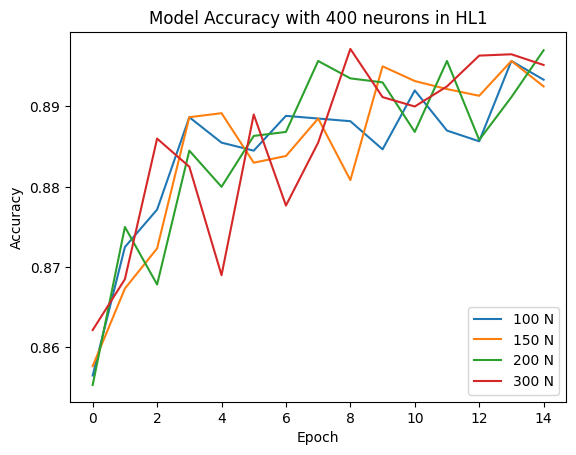

In [5]:
neurons1 = [200, 300, 400]
neurons2 = [100, 150, 200, 300]

for i in neurons1:
  hist = []
  for j in neurons2:
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(i, activation="relu", kernel_initializer=HeNormal()))
    model.add(Dense(j, activation="relu", kernel_initializer=HeNormal()))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=15,
                        validation_data=(X_valid, y_valid))
    hist.append(history)

  for k in hist:
    plt.plot(k.history['val_accuracy'])
  plt.title('Model Accuracy with ' + str(i) + ' neurons in HL1')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['100 N', '150 N', '200 N', '300 N'], loc='lower right')
  plt.show()

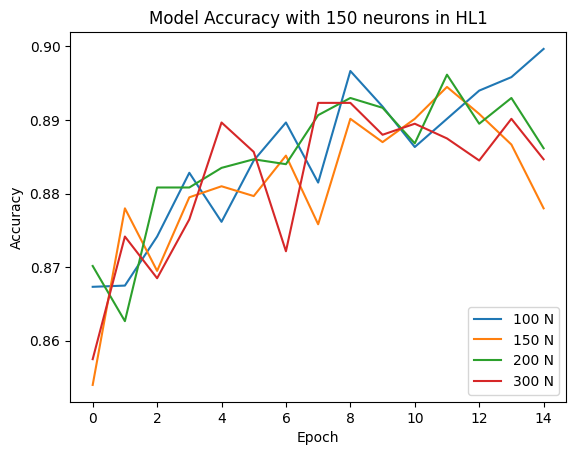

# Best Models

The best models were:

1. Adam optimizer, He Normal initialization and no Dropout
2. Adam optimizer, He Normal initialization and Dropout
3. SGD optimizer, He Normal initialization and classical momentum

In [14]:
# Model 1
model_1 = Sequential()
model_1.add(Flatten(input_shape=[28, 28]))
model_1.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model_1.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model_1.add(Dense(10, activation="softmax"))

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, epochs=30,
                        validation_data=(X_test, y_test))

Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4886 - accuracy: 0.8251 - val_loss: 57.8949 - val_accuracy: 0.8352
Epoch 2/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3644 - accuracy: 0.8655 - val_loss: 58.2866 - val_accuracy: 0.8501
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3281 - accuracy: 0.8779 - val_loss: 57.1856 - val_accuracy: 0.8448
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3047 - accuracy: 0.8882 - val_loss: 61.9088 - val_accuracy: 0.8338
Epoch 5/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2864 - accuracy: 0.8929 - val_loss: 40.7523 - val_accuracy: 0.8685
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2706 - accuracy: 0.8988 - val_loss: 52.0616 - val_accuracy: 0.8568
Epoch 7/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2585 - accuracy: 0.9024 - val_loss: 55.7624 - val_ac

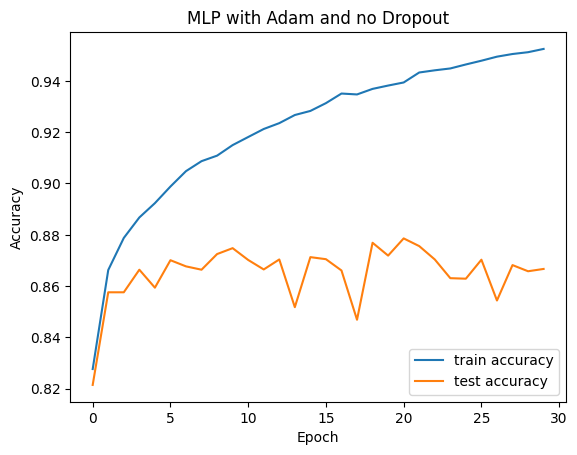

In [6]:
plt.plot(history_1.history['accuracy'], label='train accuracy')
plt.plot(history_1.history['val_accuracy'], label='test accuracy')
plt.title('MLP with Adam and no Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [7]:
# Model 2
model_2 = Sequential()
model_2.add(Flatten(input_shape=[28, 28]))
model_2.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model_2.add(Dropout(0.2))
model_2.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation="softmax"))

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=30,
                        validation_data=(X_test, y_test))

Epoch 1/30
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5573 - accuracy: 0.7991 - val_loss: 51.7003 - val_accuracy: 0.8317
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4130 - accuracy: 0.8490 - val_loss: 50.4411 - val_accuracy: 0.8465
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3810 - accuracy: 0.8618 - val_loss: 47.5685 - val_accuracy: 0.8527
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3587 - accuracy: 0.8691 - val_loss: 53.8649 - val_accuracy: 0.8470
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3386 - accuracy: 0.8757 - val_loss: 61.3574 - val_accuracy: 0.8391
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3273 - accuracy: 0.8792 - val_loss: 44.6450 - val_accuracy: 0.8596
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3191 - accuracy: 0.8809 - val_loss: 43.1324 - val_a

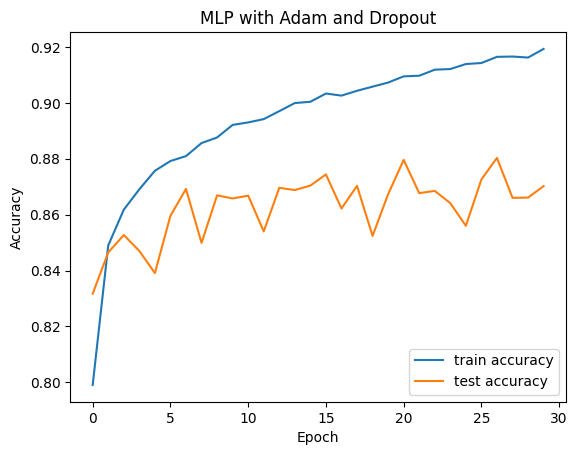

In [8]:
plt.plot(history_2.history['accuracy'], label='train accuracy')
plt.plot(history_2.history['val_accuracy'], label='test accuracy')
plt.title('MLP with Adam and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [9]:
# Model 3
model_3 = Sequential()
model_3.add(Flatten(input_shape=[28, 28]))
model_3.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model_3.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model_3.add(Dense(10, activation="softmax"))

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=SGD(
                        learning_rate=0.01,
                        momentum=0.9),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=30,
                        validation_data=(X_test, y_test))

Epoch 1/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5175 - accuracy: 0.8145 - val_loss: 81.7226 - val_accuracy: 0.8033
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3854 - accuracy: 0.8576 - val_loss: 62.4568 - val_accuracy: 0.8221
Epoch 3/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3452 - accuracy: 0.8714 - val_loss: 67.1468 - val_accuracy: 0.8227
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3196 - accuracy: 0.8819 - val_loss: 67.8026 - val_accuracy: 0.8226
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3000 - accuracy: 0.8876 - val_loss: 66.7453 - val_accuracy: 0.8187
Epoch 6/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2859 - accuracy: 0.8926 - val_loss: 68.2904 - val_accuracy: 0.8296
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2727 - accuracy: 0.8973 - val_loss: 59.4092 - val_ac

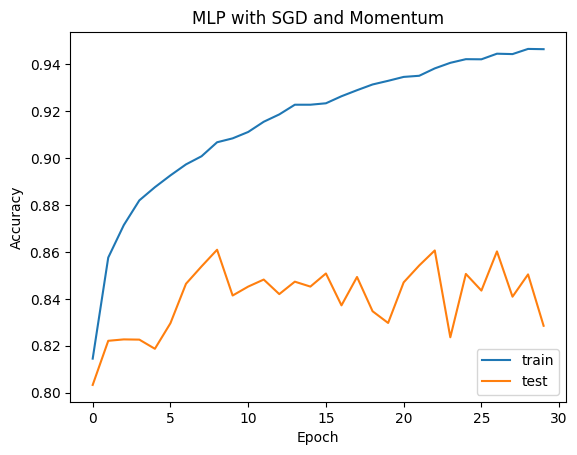

In [10]:
plt.plot(history_3.history['accuracy'], label='train')
plt.plot(history_3.history['val_accuracy'], label='test')
plt.title('MLP with SGD and Momentum')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# CIFAR10 Data

Try the 3 best models on the CIFAR10 dataset.

In [3]:
(X_train_, y_train_), (X_test_, y_test_) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
X_train_ = X_train_.astype('float32')
X_test_ = X_test_.astype('float32')
X_train_ = X_train_ / 255.0
X_test_ = X_test_ / 255.0

X_train_[0].shape

(32, 32, 3)

Try Adam optimizer, He Normal initialization and no Dropout.

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8936 - accuracy: 0.3148 - val_loss: 1.7642 - val_accuracy: 0.3567
Epoch 2/30
1563/1563 [==============================] - 5s 4ms/step - loss: 1.7067 - accuracy: 0.3880 - val_loss: 1.6162 - val_accuracy: 0.4264
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6279 - accuracy: 0.4158 - val_loss: 1.5867 - val_accuracy: 0.4276
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5776 - accuracy: 0.4336 - val_loss: 1.5807 - val_accuracy: 0.4337
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5424 - accuracy: 0.4472 - val_loss: 1.5511 - val_accuracy: 0.4384
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5125 - accuracy: 0.4595 - val_loss: 1.5028 - val_accuracy: 0.4665
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4857 - accuracy: 0.4694 - val_loss: 1.5004 - val_accuracy:

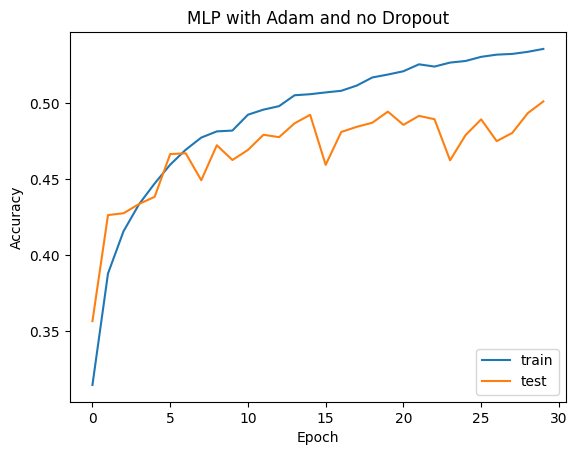

In [8]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=[32, 32, 3]))
model_1.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model_1.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model_1.add(Dense(10, activation="softmax"))

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_1 = model_1.fit(X_train_, y_train_, epochs=30,
                        validation_data=(X_test_, y_test_))

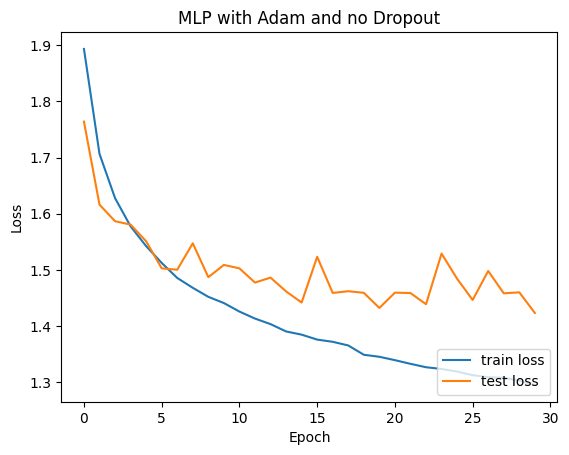

In [11]:
plt.plot(history_1.history['loss'], label='train loss')
plt.plot(history_1.history['val_loss'], label='test loss')
plt.title('MLP with Adam and no Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Epoch 1/30
1563/1563 [==============================] - 8s 4ms/step - loss: 2.0356 - accuracy: 0.2363 - val_loss: 1.8358 - val_accuracy: 0.3235
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9135 - accuracy: 0.2899 - val_loss: 1.8442 - val_accuracy: 0.3448
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8730 - accuracy: 0.3084 - val_loss: 1.7703 - val_accuracy: 0.3691
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8502 - accuracy: 0.3188 - val_loss: 1.7541 - val_accuracy: 0.3590
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8306 - accuracy: 0.3306 - val_loss: 1.7352 - val_accuracy: 0.3901
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8184 - accuracy: 0.3352 - val_loss: 1.7276 - val_accuracy: 0.3746
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8107 - accuracy: 0.3358 - val_loss: 1.7344 - val_accuracy:

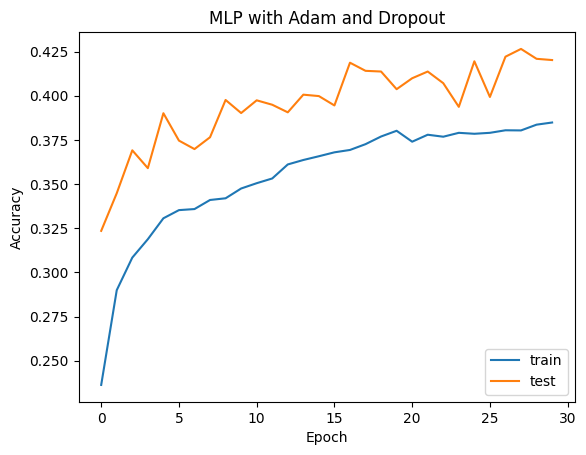

In [9]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=[32, 32, 3]))
model_2.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model_2.add(Dropout(0.2))
model_2.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation="softmax"))

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_2 = model_2.fit(X_train_, y_train_, epochs=30,
                        validation_data=(X_test_, y_test_))

plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='test')
plt.title('MLP with Adam and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8813 - accuracy: 0.3168 - val_loss: 1.8370 - val_accuracy: 0.3413
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7269 - accuracy: 0.3782 - val_loss: 1.6496 - val_accuracy: 0.4116
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6585 - accuracy: 0.4042 - val_loss: 1.5982 - val_accuracy: 0.4270
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6059 - accuracy: 0.4258 - val_loss: 1.6060 - val_accuracy: 0.4333
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5780 - accuracy: 0.4359 - val_loss: 1.5562 - val_accuracy: 0.4479
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5508 - accuracy: 0.4453 - val_loss: 1.5297 - val_accuracy: 0.4469
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5331 - accuracy: 0.4492 - val_loss: 1.5902 - val_accuracy:

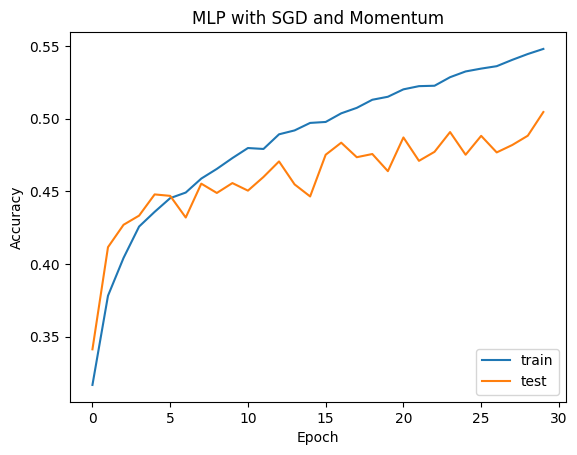

In [12]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=[32, 32, 3]))
model_3.add(Dense(300, activation="relu", kernel_initializer=HeNormal()))
model_3.add(Dense(100, activation="relu", kernel_initializer=HeNormal()))
model_3.add(Dense(10, activation="softmax"))

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=SGD(
                        learning_rate=0.01,
                        momentum=0.9),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train_, y_train_, epochs=30,
                        validation_data=(X_test_, y_test_))

plt.plot(history_3.history['accuracy'], label='train')
plt.plot(history_3.history['val_accuracy'], label='test')
plt.title('MLP with SGD and Momentum')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()